# MSBA7011 Homework 3

## Q1 Clustering - USArrests

The USArrests data is pre-loaded in R. Using hierarchical clustering method with Euclidean distance to cluster the states.

**R code for question 1 is as follows: ** <br>

** Using hierarchical clustering method with Euclidean distance to cluster the states.** <br>
data <- USArrests <br>
scale_data <- scale(data) <br>
dist_data<-dist(scale_data, method = 'euclidean') <br>

** Plot the three resulting dendrograms with complete, average and single linkages. ** <br>
complete_c <- hclust(dist_data, method='complete') <br>
average_c <- hclust(dist_data, method='average') <br>
single_c <- hclust(dist_data, method='single') <br>

plot(complete_c) <br>
plot(average_c) <br>
plot(single_c) <br>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Read images
complete_c = mpimg.imread('~/complete_c.png')
average_c = mpimg.imread('~/average_c.png')
single_c = mpimg.imread('~/single_c.png')

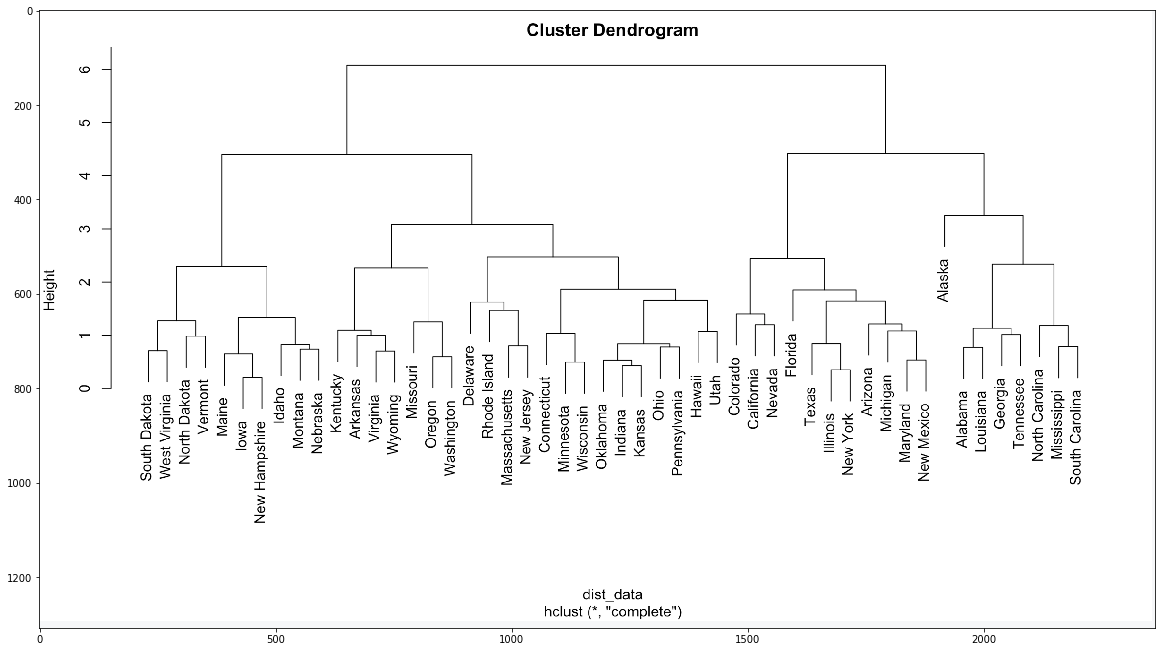

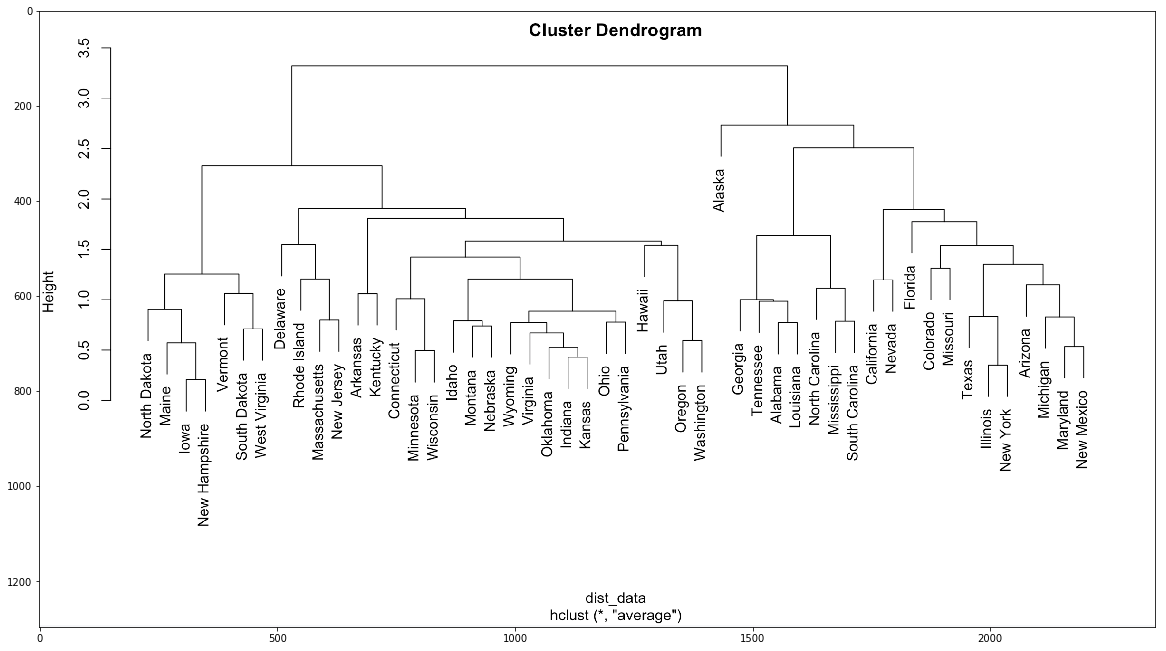

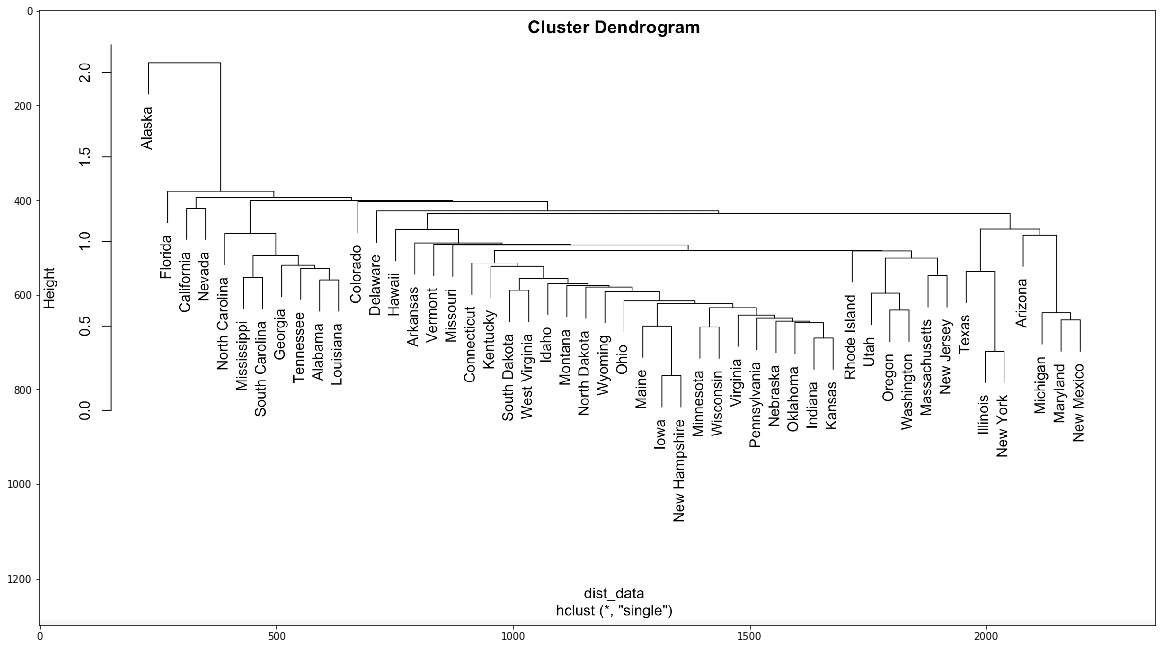

In [3]:
# Plot images
c_list = [complete_c, average_c, single_c]

for c in c_list:
    plt.figure(figsize=(20,20))
    plt.imshow(c)
    plt.show()

## Q2 LSTM - Google Stock Price

use (xt−1,xt) to predict xt+1


In [4]:
# Change directory
import os
os.chdir('~/LSTM-to-predict-Google-stock-prices-master')

In [5]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Part 1 - Data Preprocessing
np.random.seed(1)
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = pd.read_csv('Google_Stock_Price_Train.csv', usecols=[1], engine='python')
training_set = dataframe.values
training_set = training_set.astype('float32')

# normalize the dataset
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

# reshape into X=t and Y=t+2
look_back = 2
X_train, y_train = create_dataset(training_set, look_back)

# reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
# Creating an object of Sequential class to create the RNN.
regressor = Sequential()

# Adding the input layer and the LSTM layer
# 4 memory units, sigmoid activation function and (None time interval with 2 attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, look_back)))

# Adding the output layer
# 1 nueron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Using TensorFlow backend.


Epoch 1/200
1255/1255 [==============================] - 0s - loss: 0.5288     
Epoch 2/200
1255/1255 [==============================] - 0s - loss: 0.3914     
Epoch 3/200
1255/1255 [==============================] - 0s - loss: 0.2890     
Epoch 4/200
1255/1255 [==============================] - 0s - loss: 0.2132     
Epoch 5/200
1255/1255 [==============================] - 0s - loss: 0.1587     
Epoch 6/200
1255/1255 [==============================] - 0s - loss: 0.1206     
Epoch 7/200
1255/1255 [==============================] - 0s - loss: 0.0946     
Epoch 8/200
1255/1255 [==============================] - 0s - loss: 0.0775     
Epoch 9/200
1255/1255 [==============================] - 0s - loss: 0.0665     
Epoch 10/200
1255/1255 [==============================] - 0s - loss: 0.0592     
Epoch 11/200
1255/1255 [==============================] - 0s - loss: 0.0545     
Epoch 12/200
1255/1255 [==============================] - 0s - loss: 0.0513     
Epoch 13/200
1255/1255 [=============

1255/1255 [==============================] - 0s - loss: 2.9820e-04     
Epoch 196/200
1255/1255 [==============================] - 0s - loss: 2.9726e-04     
Epoch 197/200
1255/1255 [==============================] - 0s - loss: 2.9958e-04     
Epoch 198/200
1255/1255 [==============================] - 0s - loss: 2.9770e-04     
Epoch 199/200
1255/1255 [==============================] - 0s - loss: 2.9897e-04     
Epoch 200/200
1255/1255 [==============================] - 0s - loss: 2.9663e-04     


In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataframe = pd.read_csv('Google_Stock_Price_Test.csv', usecols=[1], engine='python')
test_set = dataframe.values
test_set = test_set.astype('float32')


test_set = scaler.fit_transform(test_set)
X_test, y_test = create_dataset(test_set, look_back)

# Getting the predicted stock price of 2017
inputs = X_test
inputs = np.reshape(inputs,(inputs.shape[0], 1, inputs.shape[1]))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

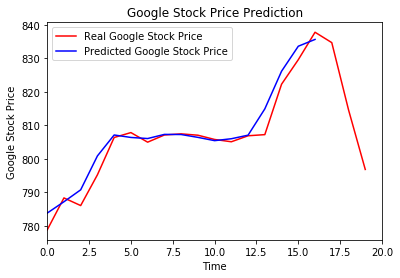

In [9]:
# Visualising the results
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlim((0,20))
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [10]:
# Part 4 - Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price[3:], predicted_stock_price))
print('RMSE:', rmse)

RMSE: 15.443145209565674


## Q3 LSTM - Tencent

Choose a stock by yourself.  
Train a LSTM network model to predict future stock price. Test the performance on the testing set.

**
Stock: Tencent Holdings Limited (0700.HK) <br>
Training set: 2012.01.01 - 2016.12.31 Daily opening price <br>
Test set: 2017.01.01 - 2017.12.13 Daily opening price <br>
Model 1: LSTM Lag3 <br>
(Xt-2, Xt-1, Xt) --> Xt+1 <br>
Model 2: LSTM Lag1 <br>
**

### Model 1: Lag3

In [11]:
# Change directory
import os
os.chdir('~/DATA')

In [12]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Part 1 - Data Preprocessing 

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = pd.read_csv('Tencent_train.csv', usecols=[1], engine='python')
training_set = dataframe.values
training_set = training_set.astype('float32')

# normalize the dataset
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

# reshape into X=t and Y=t+3
look_back = 3
X_train, y_train = create_dataset(training_set, look_back)

# reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
# Creating an object of Sequential class to create the RNN.
regressor = Sequential()

# Adding the input layer and the LSTM layer
# 4 memory units, sigmoid activation function and (None time interval with look_back attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, look_back)))

# Adding the output layer
# 1 nueron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1228/1228 [==============================] - 0s - loss: 0.2609     
Epoch 2/200
1228/1228 [==============================] - 0s - loss: 0.1888     
Epoch 3/200
1228/1228 [==============================] - 0s - loss: 0.1366     
Epoch 4/200
1228/1228 [==============================] - 0s - loss: 0.1015     
Epoch 5/200
1228/1228 [==============================] - 0s - loss: 0.0797     
Epoch 6/200
1228/1228 [==============================] - 0s - loss: 0.0670     
Epoch 7/200
1228/1228 [==============================] - 0s - loss: 0.0601     
Epoch 8/200
1228/1228 [==============================] - 0s - loss: 0.0561     
Epoch 9/200
1228/1228 [==============================] - 0s - loss: 0.0535     
Epoch 10/200
1228/1228 [==============================] - 0s - loss: 0.0514     
Epoch 11/200
1228/1228 [==============================] - 0s - loss: 0.0495     
Epoch 12/200
1228/1228 [==============================] - 0s - loss: 0.0476     
Epoch 13/200
1228/1228 [=============

1228/1228 [==============================] - 0s - loss: 2.3143e-04     
Epoch 195/200
1228/1228 [==============================] - 0s - loss: 2.3295e-04     
Epoch 196/200
1228/1228 [==============================] - 0s - loss: 2.2860e-04     
Epoch 197/200
1228/1228 [==============================] - 0s - loss: 2.2486e-04     
Epoch 198/200
1228/1228 [==============================] - 0s - loss: 2.2394e-04     
Epoch 199/200
1228/1228 [==============================] - 0s - loss: 2.2768e-04     
Epoch 200/200
1228/1228 [==============================] - 0s - loss: 2.2291e-04     


In [15]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
test_set = pd.read_csv('Tencent_test.csv')
real_stock_price = test_set.iloc[:,1:2].values

test_set = scaler.fit_transform(real_stock_price)
X_test, y_test = create_dataset(test_set, look_back)

# Getting the predicted stock price of 2017
inputs = X_test
inputs = np.reshape(inputs, (inputs.shape[0], 1, inputs.shape[1]))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

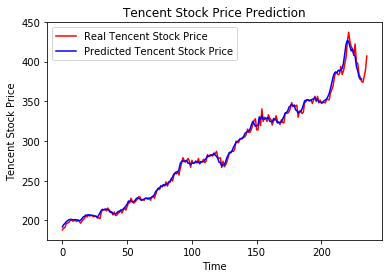

In [16]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Tencent Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tencent Stock Price')
plt.title('Tencent Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tencent Stock Price')
plt.legend()
plt.show()

In [17]:
# Part 4 - Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price[4:], predicted_stock_price))
print('RMSE:', rmse)

RMSE: 8.18858647394017


### Model 2: Lag 1

In [18]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing
# Importing the training set
# Just predicting the "Open Stock Price" for Google. So extracting 1 column.
training_set = pd.read_csv('Tencent_train.csv')
# Getting just the Open Stock Price for input of our RNN.
# To convert the Vector form of a single column into a Matrix form, we will use 1:2 as the column index. 
# The 2nd column will be ignored and we will get our Open Stock Price Column in a Matrix form.
# Output will be a 2d Numpy array, exactly what we want.
training_set = training_set.iloc[:,1:2].values

# Feature Scaling
# Will use Normalisation as the Scaling function.
# Default range for MinMaxScaler is 0 to 1, which is what we want. So no arguments in it.
 # Will fit the training set to it and get it scaled and replace the original set.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
# Restricting the input and output based on how LSTM functions.
X_train = training_set[0:1231]
y_train = training_set[1:1232]

# Reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (1231, 1, 1))

In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
# Creating an object of Sequential class to create the RNN.
regressor = Sequential()

# Adding the input layer and the LSTM layer
# 4 memory units, sigmoid activation function and (None time interval with 1 attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
# 1 nueron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1231/1231 [==============================] - 0s - loss: 0.1636     
Epoch 2/200
1231/1231 [==============================] - 0s - loss: 0.1096     
Epoch 3/200
1231/1231 [==============================] - 0s - loss: 0.0782     
Epoch 4/200
1231/1231 [==============================] - 0s - loss: 0.0619     
Epoch 5/200
1231/1231 [==============================] - 0s - loss: 0.0545     
Epoch 6/200
1231/1231 [==============================] - 0s - loss: 0.0511     
Epoch 7/200
1231/1231 [==============================] - 0s - loss: 0.0494     
Epoch 8/200
1231/1231 [==============================] - 0s - loss: 0.0482     
Epoch 9/200
1231/1231 [==============================] - 0s - loss: 0.0471     
Epoch 10/200
1231/1231 [==============================] - 0s - loss: 0.0460     
Epoch 11/200
1231/1231 [==============================] - 0s - loss: 0.0449     
Epoch 12/200
1231/1231 [==============================] - 0s - loss: 0.0436     
Epoch 13/200
1231/1231 [=============

1231/1231 [==============================] - 0s - loss: 1.5419e-04     
Epoch 195/200
1231/1231 [==============================] - 0s - loss: 1.5327e-04     
Epoch 196/200
1231/1231 [==============================] - 0s - loss: 1.5473e-04     
Epoch 197/200
1231/1231 [==============================] - 0s - loss: 1.5387e-04     
Epoch 198/200
1231/1231 [==============================] - 0s - loss: 1.5747e-04     
Epoch 199/200
1231/1231 [==============================] - 0s - loss: 1.5389e-04     
Epoch 200/200
1231/1231 [==============================] - 0s - loss: 1.5739e-04     


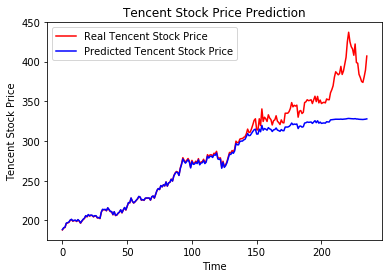

In [20]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('Tencent_test.csv')
real_stock_price = test_set.iloc[:,1:2].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (236, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tencent Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tencent Stock Price')
plt.title('Tencent Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tencent Stock Price')
plt.legend()
plt.show()

In [21]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE:', rmse)

RMSE: 26.25806271614691


**Overall, Lag3 model performs better, with 8.19 RMSE. **